# Trabajo 2: Árboles de Decisión y Regresiones Lineales

**Integrantes:**

- Jose Santiago Pelaez Ramirez - 1001517472
- Santiago Franco Mejía - 1000655440

**Instrucciones:**

- Modifique el nombre de este archivo con los nombres de los integrantes.
- Agrege los nombres y documentos de los integrantes del equipo en la sección de arriba.
- Resuelva la situación planteada cumpliendo los criterios de aceptación. Estos criterios son los que determinarán su calificación.
- Entregue **únicamente** este notebook. No se aceptarán otro tipo de entregas.

# Criterios de Aceptación

1. **(30%)** Análisis descriptivo de los datos. Realice:
    - Una descripción de cada variable del conjunto de datos.
    - Un recuento de variables nulas en los datos.
    - Un histograma de frecuencias de cada variable.
    - Un gráfico de barras comparando cada variable con la variable objetivo.
    - Un gráfico de mapa de calor de la correlación de los datos.
2. **(30%)** Realice un modelo de árbol de decisión regresor.
    - Divida el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba.
    - Cree variables Dummy para las variables categóricas.
    - Cree y entrene un modelo de árbol de decisión regresor.
    - Entrene hiperparámetros para ajustar el modelo.
    - Del modelo resultante, calcule:
        - Score.
        - Mean Square Error.
        - Root of Mean Square Error.
3. **(30%)** Realice un modelo de regresión lineal.
    - Estandarize las variables numéricas utilizando la técnica `Z-Score`.
    - Cree variables Dummy para las variables categóricas.
    - Divida el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba.
    - Cree y entrene un modelo de regresión lineal múltiple.
    - Del modelo resultante, calcule:
        - Score.
        - Mean Square Error.
        - Root of Mean Square Error.
4. **(10%)** De acuerdo a los resultados de los modelos, argumente cuál es el mejor.

**NOTA: Recuerte definir las semillas aleatorias para que sus resultados sean replicables.**

# Dataset

Este dataset contiene información de venta de apartamentos de los últimos 10 años para un distrito específico en una ciudad.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('Daegu_Real_Estate_data.csv')
pd.set_option('display.max_columns', 100)

In [3]:
df

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_APT,N_manager,N_elevators,SubwayStation,N_FacilitiesNearBy(PublicOffice),N_FacilitiesNearBy(Hospital),N_FacilitiesNearBy(Dpartmentstore),N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,2007,8,814,3,terraced,individual_heating,management_in_trust,111.0,184.0,5min~10min,10min~15min,3.0,3.0,0.0,Kyungbuk_uni_hospital,2.0,1,1.0,1.0,1.0,0.0,3.0,2.0,2.0,2.0,5,6.0,9.0
1,51327,1985,2007,8,587,8,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,1.0,2.0,2.0,Daegu,5.0,1,2.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
2,48672,1985,2007,8,587,6,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,1.0,2.0,2.0,Daegu,5.0,1,2.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
3,380530,2006,2007,8,2056,8,terraced,individual_heating,management_in_trust,249.0,536.0,0~5min,0-5min,6.0,5.0,11.0,Sin-nam,1.0,1,0.0,1.0,0.0,0.0,2.0,2.0,1.0,2.0,5,3.0,7.0
4,221238,1993,2007,8,1761,3,mixed,individual_heating,management_in_trust,523.0,536.0,0~5min,15min~20min,8.0,8.0,20.0,Myung-duk,6.0,2,0.0,1.0,5.0,0.0,4.0,3.0,5.0,5.0,4,14.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,511504,2007,2017,8,1643,19,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,7.0,14.0,16.0,Kyungbuk_uni_hospital,3.0,1,2.0,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5887,298230,2006,2017,8,903,13,terraced,individual_heating,management_in_trust,123.0,181.0,5min~10min,0-5min,3.0,3.0,11.0,Myung-duk,3.0,1,1.0,1.0,2.0,0.0,4.0,3.0,3.0,1.0,4,8.0,11.0
5888,357522,2007,2017,8,868,20,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,7.0,14.0,16.0,Kyungbuk_uni_hospital,3.0,1,2.0,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5889,312389,1978,2017,8,1327,1,corridor,individual_heating,self_management,87.0,0.0,0~5min,0-5min,2.0,1.0,4.0,Kyungbuk_uni_hospital,3.0,2,1.0,1.0,0.0,0.0,3.0,3.0,3.0,2.0,3,7.0,11.0


# Primer punto

### 1.

•	SalePrice: Precio de venta para la propiedad establecido posiblemente en dolares.

•	YearBuilt: Año en el que se construyo la propiedad, este mismo podria indicarse como antiguedad del inmueble.

•	YrSold: Año en el que se vendio el inmueble por ultima vez.

•	MonthSold: Mes en el que se realizo la ultima venta del inmueble.

•	Size(sqf): Medida del inmueble en pies cuadrados.

•	Floor: Piso en el que se encuentra el inmueble.

•	HallwayType: Tipo de pasillo que posee el inmueble.

•	HeatingType: Tipo de calefacción que tiene el inmueble.

•	AptManageType: Tipo de administracion que tiene el inmueble respecto a los cuidados que este presenta.

•	N_Parkinglot(Ground): Numero de estacionamientos disponibles a nivel del suelo.

•	N_Parkinglot(Basement): Numero de estacionamientos disponibles bajo el nivel del suelo.

•	TimeToBusStop: Intervalos de espera estimados para la llegada de autobuses.

•	TimeToSubway: Intervalos de espera estimados para la llegaeda de trenes.

•	N_APT: Numero identificador unico del apartamento dentro de los conjuntos residenciales que puedan encontrarse.

•	N_MANAGER: Numero de administradores a cargo del inmueble.

•	N_manager: cantidad de managers

•	N_elevators: cantidad de elevadores en la instalación

•	SubwayStation: Estacion de subterráneo más cercana

•	N_FacilitiesNearBy(PublicOffice): Cantidad instalaciones cerca a oficina publica

•	N_FacilitiesNearBy(Hospital): cantidad de instalaciones cerca de un hospital

•	N_FacilitiesNearBy(Dpartmentstore): Cantidad de instalaciones cerca de una tienda departamental

•	N_FacilitiesNearBy(Mall): Instalaciones cerca de un mall

•	N_FacilitiesNearBy(ETC): Instalaciones cerda a lugares donde no están listados

•	N_FacilitiesNearBy(Park): instalaciones cerca de un parque

•	N_SchoolNearBy(Elementary): Instalaciones cerca de una escuela primaria

•	N_SchoolNearBy(Middle): Instalaciones cerca de una escuela secundaria

•	N_SchoolNearBy(High): Instalaciones cerca de una escuela preparatoria

•	N_SchoolNearBy(University): Instalaciones cerca de una universidad

•	N_FacilitiesInApt: instalaciones en el mismo conjunto de apartamentos

•	N_FacilitiesNearBy(Total): Instalaciones cercanas en total

•	N_SchoolNearBy(Total): escuelas cercanas en total

### 2.

No hay ningun valor que se pueda considerar nulo en este dataframe

In [4]:
null_counts = df.isnull().sum()
print(null_counts)

SalePrice                             0
YearBuilt                             0
YrSold                                0
MonthSold                             0
Size(sqf)                             0
Floor                                 0
HallwayType                           0
HeatingType                           0
AptManageType                         0
N_Parkinglot(Ground)                  0
N_Parkinglot(Basement)                0
TimeToBusStop                         0
TimeToSubway                          0
N_APT                                 0
N_manager                             0
N_elevators                           0
SubwayStation                         0
N_FacilitiesNearBy(PublicOffice)      0
N_FacilitiesNearBy(Hospital)          0
N_FacilitiesNearBy(Dpartmentstore)    0
N_FacilitiesNearBy(Mall)              0
N_FacilitiesNearBy(ETC)               0
N_FacilitiesNearBy(Park)              0
N_SchoolNearBy(Elementary)            0
N_SchoolNearBy(Middle)                0


### 3.

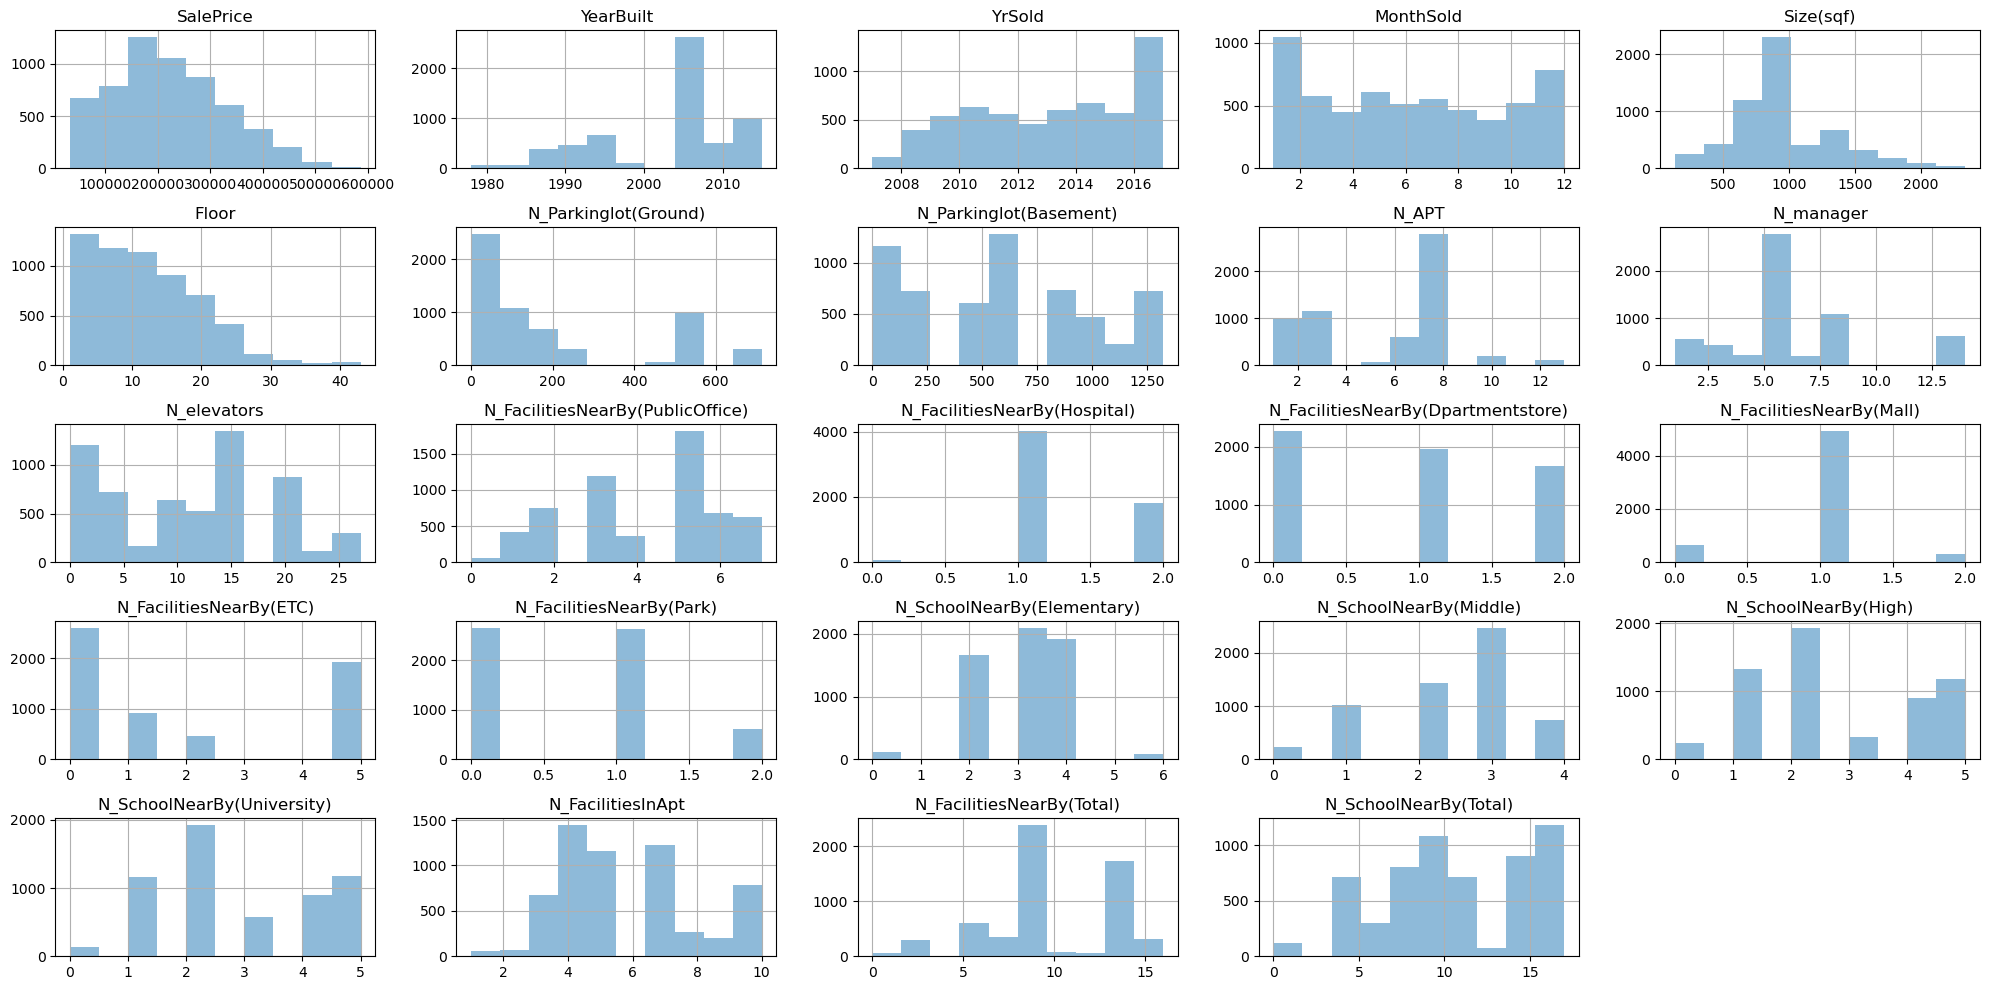

In [5]:
df.hist(alpha=0.5, figsize=(20, 10))
plt.tight_layout()
plt.show()

### 4.

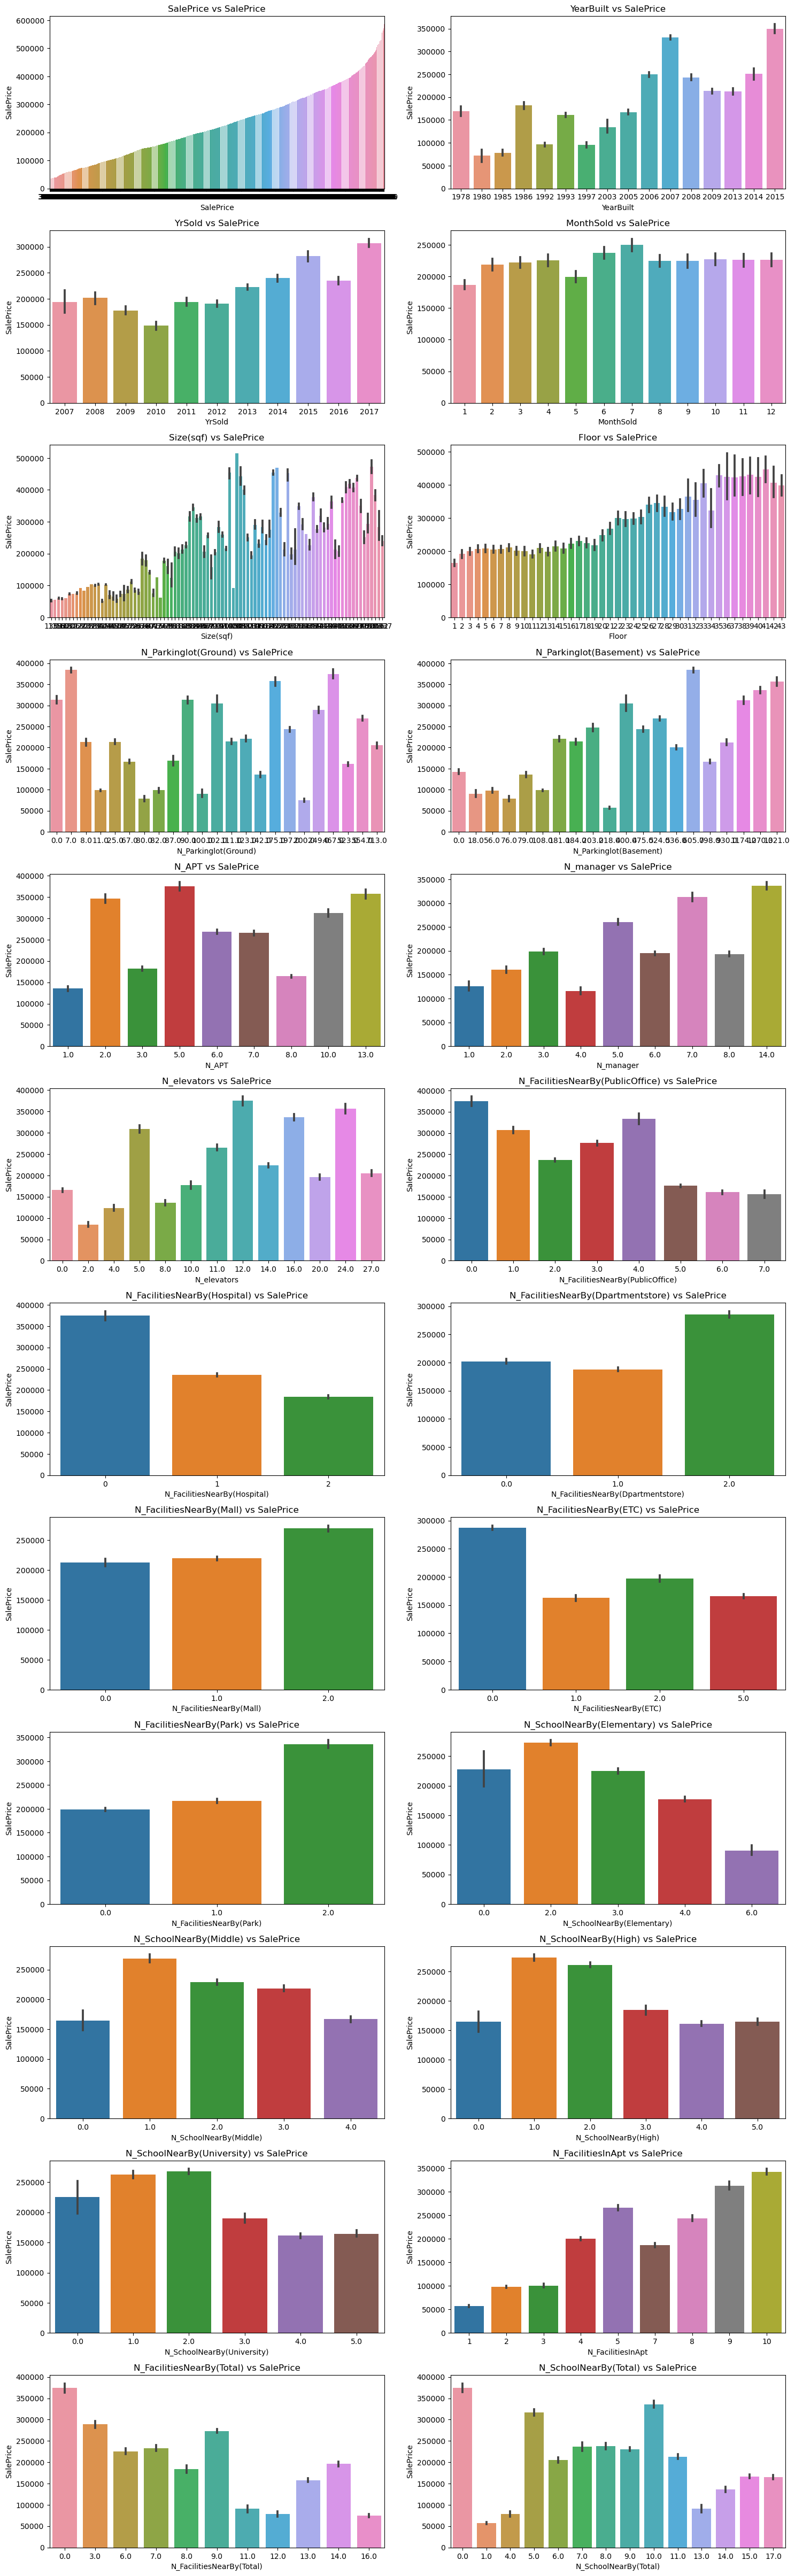

In [6]:
numeric_df = df.select_dtypes(include=['number'])
num_rows = len(numeric_df.columns)
num_cols = 2 

plt.figure(figsize=(15, num_rows * 4))

for i, col in enumerate(numeric_df.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.barplot(data=df, x=col, y='SalePrice')
    plt.title(f'{col} vs SalePrice')

plt.tight_layout()
plt.show()

### 5.

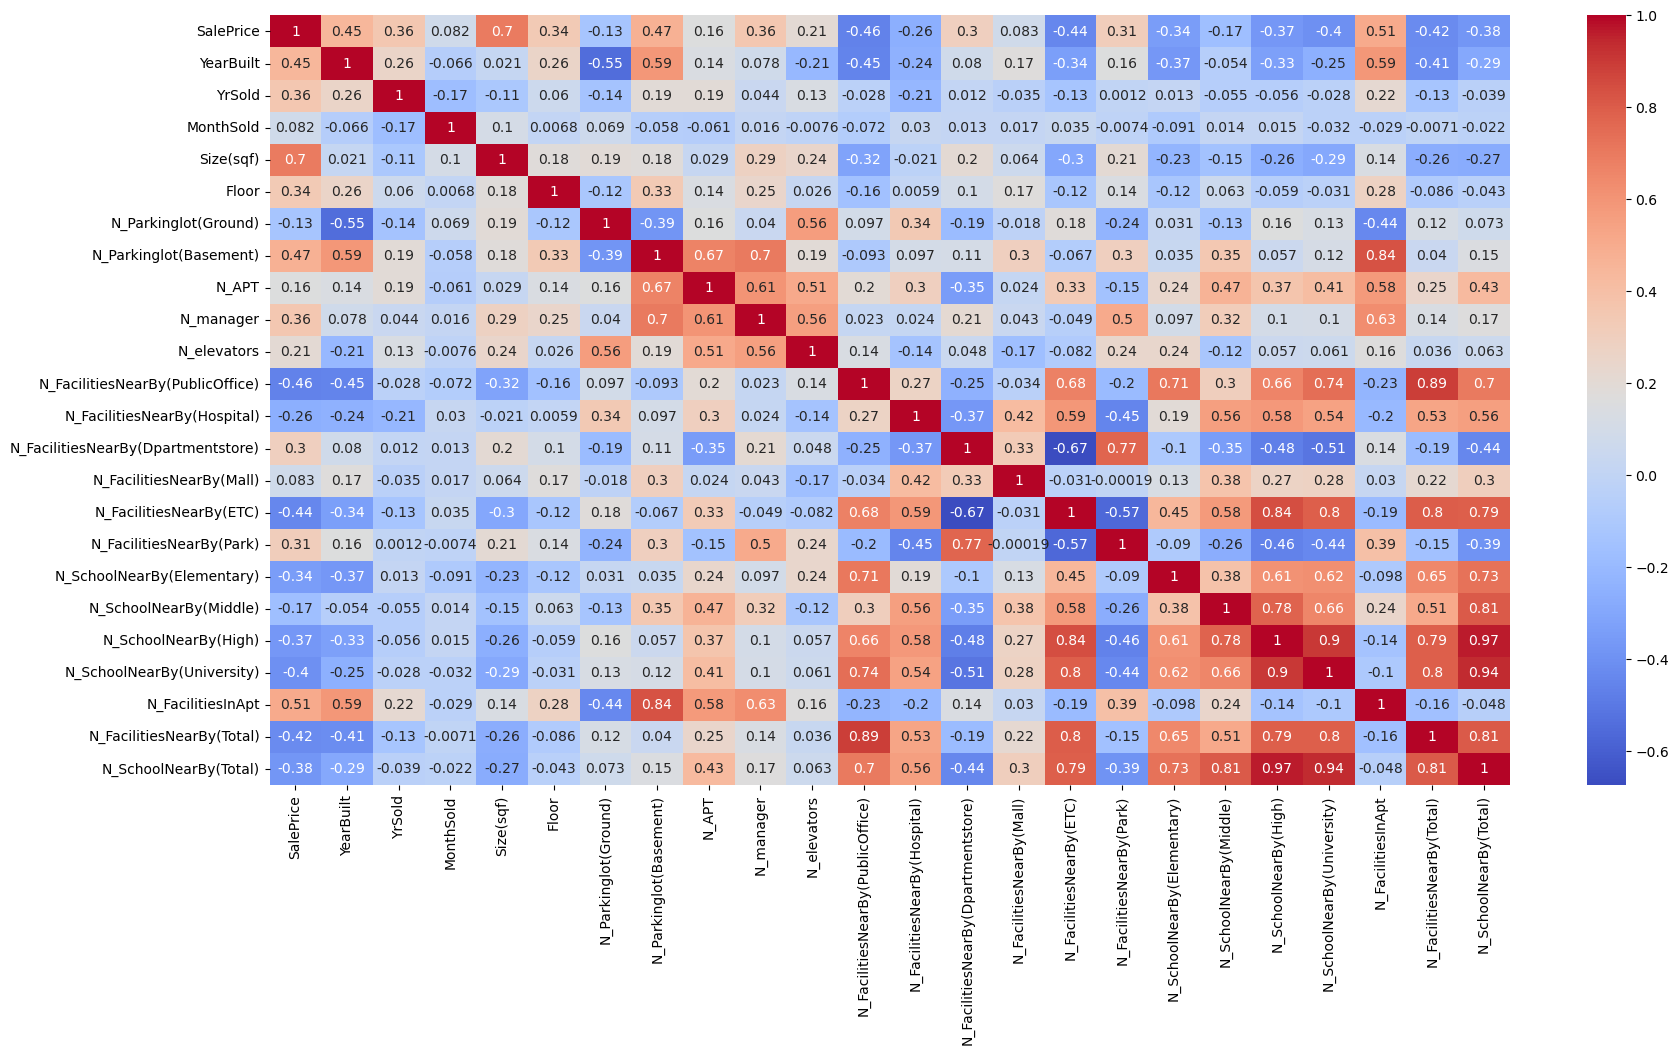

In [7]:
corr_matrix = df.corr(numeric_only=True)  # Esto selecciona solo columnas numéricas para el cálculo de correlación

fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.show()

# Segundo punto

### 1.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
columnas_entrenamiento = df.columns[:30]

X_train, X_test, y_train, y_test = train_test_split(df[columnas_entrenamiento], df['SalePrice'], test_size=0.2, random_state=42)


### 2.

### 3.

In [20]:
data = df
columns = ['HallwayType', 'HeatingType', 'AptManageType', 'SubwayStation',
           'TimeToBusStop', 'TimeToSubway']

data = pd.get_dummies(data, columns=columns)

X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1001517472)

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2_score = regressor.score(X_test, y_test)

print(f'R^2 Score: {r2_score}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Dataset shape: {X.shape}')

R^2 Score: 0.9652121506396124
Mean Squared Error (MSE): 402371414.134834
Root Mean Squared Error (RMSE): 20059.19774404834
Dataset shape: (5891, 46)


### 4.

In [21]:
from math import sqrt

columns = ['HallwayType', 'HeatingType', 'AptManageType', 'SubwayStation',
           'TimeToBusStop', 'TimeToSubway']

data = pd.get_dummies(df, columns=columns)

X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1001517472)

regressor = DecisionTreeRegressor(max_depth=5, min_samples_split=5, min_samples_leaf=2, random_state=100)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2_score = regressor.score(X_test, y_test)

print(f'R^2 Score: {r2_score}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Dataset shape: {X.shape}')

R^2 Score: 0.9034562302957938
Mean Squared Error (MSE): 1116667280.559835
Root Mean Squared Error (RMSE): 33416.57194506694
Dataset shape: (5891, 46)


## Punto cuatro

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

data = df
columns = ['HallwayType', 'HeatingType', 'AptManageType', 'SubwayStation', 'TimeToBusStop', 'TimeToSubway']

X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

np.random.seed(1000655440)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

X_train = pd.get_dummies(X_train, columns=columns)
X_test = pd.get_dummies(X_test, columns=columns)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

y_pred = regression_model.predict(X_test)

r2_score = regression_model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print(f'Score: {r2_score}')
print(f'Mean Square Error (MSE): {mse}')
print(f'Root Mean Square Error (RMSE): {rmse}')

Score: 0.870774092470255
Mean Square Error (MSE): 1419646573.0261188
Root Mean Square Error (RMSE): 37678.197581971974


## Punto cinco

Segun los datos arrojados, el mejor resultado es el del arbol de regresion sin hiperparametros ya que tiene el score mas alto y el RMSE mas bajo, aunque al ser tan alto este este valor tambien se puede tomar como un valor para descartar, ya que es muy cercano al 1, siendo esto el mejor modelo de datos usado seria 